In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder #Para atributo 'SEXO'
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#DADOS DOS PACIENTES

df = pd.read_excel('C:/Users/Gabriel/Desktop/Dados HRV/DADOSHRV.xlsx')
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
train_mice = df.copy()

mice_imputer = IterativeImputer(random_state=42)
df['ALTURA'] = mice_imputer.fit_transform(df[['ALTURA']])
df['PESO'] = mice_imputer.fit_transform(df[['PESO']])

df['IMC'] = df['PESO']/(df['ALTURA'] * df['ALTURA'])

ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['SEXO']])

df[ohe.categories_[0]] = transformed.toarray()
df.drop('SEXO', axis = 1, inplace=True)
df

,CLASSE,IAH,MI,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M
0,NORMAL,3.07,40.88,0.03,87,35,1.660000,69.600000,25.257657,49.5922,...,-11.9732,10.4526,46.6220,47.8699,-0.2132,17.2253,68.7786,13.9962,1.0,0.0
1,NORMAL,1.93,18.82,0.00,92,50,1.590000,98.700000,39.041177,48.4985,...,-6.3287,6.1144,49.2434,48.9933,-0.1273,24.8110,60.5646,14.6244,1.0,0.0
2,NORMAL,0.40,54.30,0.00,92,27,1.800000,91.000000,28.086420,51.0391,...,-13.4549,14.9428,52.3657,57.2754,2.4017,27.1533,51.4026,21.4442,0.0,1.0
3,NORMAL,3.65,25.52,1.37,41,61,1.590000,103.700000,41.018947,60.8169,...,-14.5812,14.4796,50.0457,50.2848,0.0960,11.2946,58.4855,30.2198,1.0,0.0
4,NORMAL,1.15,22.25,0.07,88,26,1.649234,59.700000,21.948760,47.7805,...,-29.3785,35.4046,54.5368,56.3937,1.4414,12.7135,79.9516,7.3349,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,GRAVE,117.50,115.00,34.30,69,63,1.620000,89.500000,34.103033,54.1595,...,-11.6846,10.8219,47.8445,48.0653,-0.2136,31.9158,46.3412,21.7430,1.0,0.0
287,GRAVE,72.00,39.30,68.40,67,64,1.640000,127.000000,47.218917,64.2736,...,-5.2141,7.1196,57.4381,57.5743,1.4235,9.6522,61.7281,28.6197,1.0,0.0
288,GRAVE,33.80,26.40,1.80,82,51,1.650000,94.200000,34.600551,48.8423,...,-19.3183,21.7097,52.3061,56.6817,2.0795,24.6303,59.7656,15.6041,0.0,1.0
289,GRAVE,34.30,30.40,4.60,83,59,1.649234,89.262007,32.817260,62.6354,...,-3.5383,4.1281,52.1756,53.5385,0.7252,21.7171,52.3949,25.8880,0.0,1.0


In [3]:
from imblearn.over_sampling import SMOTE
#Realiza o over-sampling
smote = SMOTE()
from sklearn.impute import IterativeImputer as imputer
X, y = smote.fit_resample(df.iloc[:, 3:], df['CLASSE'])
from collections import Counter
print(y.value_counts())

CLASSE
NORMAL      111
LEVE        111
MODERADO    111
GRAVE       111
Name: count, dtype: int64


In [4]:
oversample_df = X
oversample_df['CLASSE'] = y
#mostra se é artificial ou não
oversample_df

,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,W1,W2,...,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M,CLASSE
0,0.030000,87,35,1.660000,69.600000,25.257657,49.592200,4.076800,48.394300,42.170300,...,10.452600,46.622000,47.869900,-0.213200,17.225300,68.778600,13.996200,1.000000,0.000000,NORMAL
1,0.000000,92,50,1.590000,98.700000,39.041177,48.498500,6.378800,52.100300,31.133300,...,6.114400,49.243400,48.993300,-0.127300,24.811000,60.564600,14.624400,1.000000,0.000000,NORMAL
2,0.000000,92,27,1.800000,91.000000,28.086420,51.039100,14.482900,30.688100,42.071000,...,14.942800,52.365700,57.275400,2.401700,27.153300,51.402600,21.444200,0.000000,1.000000,NORMAL
3,1.370000,41,61,1.590000,103.700000,41.018947,60.816900,5.623500,20.441900,59.728200,...,14.479600,50.045700,50.284800,0.096000,11.294600,58.485500,30.219800,1.000000,0.000000,NORMAL
4,0.070000,88,26,1.649234,59.700000,21.948760,47.780500,1.478000,55.017600,42.248400,...,35.404600,54.536800,56.393700,1.441400,12.713500,79.951600,7.334900,1.000000,0.000000,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,0.000000,91,37,1.534743,82.675526,34.538771,54.404229,4.310656,42.843325,38.169031,...,6.064511,51.323582,51.945632,0.398311,20.502666,60.856040,18.641333,1.000000,0.000000,NORMAL
440,1.270296,44,57,1.585326,100.942573,40.134023,60.550847,5.755218,20.835542,59.367912,...,14.326882,50.089632,50.403883,0.118324,11.625195,58.309508,30.065213,1.000000,0.000000,NORMAL
441,0.000000,90,30,1.673002,69.160202,24.691845,55.240157,6.372575,36.939148,41.353431,...,7.293235,51.047096,52.131921,0.560074,24.305831,58.469823,17.224246,1.000000,0.000000,NORMAL
442,0.564792,86,61,1.582675,63.267490,25.221404,62.165782,0.964291,28.796928,52.900557,...,4.928174,48.961224,49.250034,-0.178942,13.425572,68.192530,18.381998,0.929584,0.070416,NORMAL


In [5]:
salvar = pd.DataFrame(oversample_df)
salvar.to_csv('HRVover.csv', index=False)

In [5]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

from xailib.data_loaders.dataframe_loader import prepare_dataframe
from xailib.explainers.lime_explainer import LimeXAITabularExplainer
from xailib.explainers.lore_explainer import LoreTabularExplainer
from xailib.explainers.shap_explainer_tab import ShapXAITabularExplainer
from xailib.models.sklearn_classifier_wrapper import sklearn_classifier_wrapper

In [6]:
source_file = 'C:/Users/Gabriel/Pasta/Machine Learning/Aplicações Biblioteca LORE/HRVover.csv'
class_field = 'CLASSE'
dfLORE = pd.read_csv(source_file, skipinitialspace=True, na_values='?', keep_default_na=True)

In [7]:
dfLORE, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = prepare_dataframe(dfLORE, class_field)
dfLORE

,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,W1,W2,...,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M,CLASSE
0,0.030000,87,35,1.660000,69.600000,25.257657,49.592200,4.076800,48.394300,42.170300,...,10.452600,46.622000,47.869900,-0.213200,17.225300,68.778600,13.996200,1.000000,0.000000,3
1,0.000000,92,50,1.590000,98.700000,39.041177,48.498500,6.378800,52.100300,31.133300,...,6.114400,49.243400,48.993300,-0.127300,24.811000,60.564600,14.624400,1.000000,0.000000,3
2,0.000000,92,27,1.800000,91.000000,28.086420,51.039100,14.482900,30.688100,42.071000,...,14.942800,52.365700,57.275400,2.401700,27.153300,51.402600,21.444200,0.000000,1.000000,3
3,1.370000,41,61,1.590000,103.700000,41.018947,60.816900,5.623500,20.441900,59.728200,...,14.479600,50.045700,50.284800,0.096000,11.294600,58.485500,30.219800,1.000000,0.000000,3
4,0.070000,88,26,1.649234,59.700000,21.948760,47.780500,1.478000,55.017600,42.248400,...,35.404600,54.536800,56.393700,1.441400,12.713500,79.951600,7.334900,1.000000,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,0.000000,91,37,1.534743,82.675526,34.538771,54.404229,4.310656,42.843325,38.169031,...,6.064511,51.323582,51.945632,0.398311,20.502666,60.856040,18.641333,1.000000,0.000000,3
440,1.270296,44,57,1.585326,100.942573,40.134023,60.550847,5.755218,20.835542,59.367912,...,14.326882,50.089632,50.403883,0.118324,11.625195,58.309508,30.065213,1.000000,0.000000,3
441,0.000000,90,30,1.673002,69.160202,24.691845,55.240157,6.372575,36.939148,41.353431,...,7.293235,51.047096,52.131921,0.560074,24.305831,58.469823,17.224246,1.000000,0.000000,3
442,0.564792,86,61,1.582675,63.267490,25.221404,62.165782,0.964291,28.796928,52.900557,...,4.928174,48.961224,49.250034,-0.178942,13.425572,68.192530,18.381998,0.929584,0.070416,3


## GABARITO
### NORMAL - 3
### MODERADO - 2 
### LEVE - 1
### GRAVE - 0

In [8]:
X_LORE=dfLORE.iloc[:, 0:42].copy()
y_LORE=dfLORE['CLASSE'].copy()

In [9]:
RF=RandomForestClassifier(random_state=0)
RF.fit(X_LORE,y_LORE)
predict=RF.predict(X_LORE)

In [10]:
bbox = sklearn_classifier_wrapper(RF)

In [11]:
#print(y_test_filtrado)
#print(predict)

In [12]:
instância = X_LORE.iloc[1].values
instância.reshape(1, -1)
print('Instance ',instância)
print('True class ', y_LORE.iloc[1])
print('Predicted class ', predict[1])

Instance  [ 0.00000000e+00  9.20000000e+01  5.00000000e+01  1.59000000e+00
  9.87000000e+01  3.90411772e+01  4.84985000e+01  6.37880000e+00
  5.21003000e+01  3.11333000e+01  1.03876000e+01  3.60760000e+01
  4.90090000e+01  4.42120000e+00  1.04938000e+01  1.46631900e+02
  1.11520100e+02  9.20947000e+01  5.22117000e+01  4.77883000e+01
  1.73610000e+00  7.39088300e+02  2.44593000e+01  1.31973000e+01
  1.17010000e+00  1.72920000e+00  1.45070000e+00  7.34000000e-01
  2.42970000e+00  4.23420000e+00  2.27800000e+00  9.34800000e-01
 -6.32870000e+00  6.11440000e+00  4.92434000e+01  4.89933000e+01
 -1.27300000e-01  2.48110000e+01  6.05646000e+01  1.46244000e+01
  1.00000000e+00  0.00000000e+00]
True class  3
Predicted class  3


In [13]:
explainer = LoreTabularExplainer(bbox)
config = {'neigh_type':'rndgen', 'size':1000, 'ocr':0.1, 'ngen':10}
explainer.fit(dfLORE, class_field, config)
exp = explainer.explain(instância)
print(exp)

In [14]:
exp_dict_exemple=exp.expDict
print(exp_dict_exemple)

{'bb_pred': 3, 'dt_pred': 3, 'rule': {'premise': [{'att': 'T90', 'op': '<=', 'thr': 0.07491600513458252, 'is_continuous': True}, {'att': 'SATMIN', 'op': '>', 'thr': 91.25527572631836, 'is_continuous': True}, {'att': 'ALTURA', 'op': '<=', 'thr': 1.6888543367385864, 'is_continuous': True}, {'att': 'LFABS', 'op': '<=', 'thr': 1295.2991333007812, 'is_continuous': True}, {'att': 'BIN2V', 'op': '<=', 'thr': 34.3370475769043, 'is_continuous': True}, {'att': 'EHLERS', 'op': '>', 'thr': -0.6213326752185822, 'is_continuous': True}, {'att': 'W3', 'op': '>', 'thr': -1.5279704332351685, 'is_continuous': True}, {'att': 'IMC', 'op': '>', 'thr': 21.751866340637207, 'is_continuous': True}, {'att': 'W1', 'op': '<=', 'thr': 60.15034484863281, 'is_continuous': True}], 'cons': 3, 'class_name': 'CLASSE'}, 'crules': [], 'deltas': [], 'fidelity': 0.9790325775361568, 'dt': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 

In [16]:
exp.plotRules()

In [17]:
exp.plotCounterfactualRules()

## GERANDO AS EXPLICAÇÕES E O BANCO DE DADOS COM TODAS AS INSTÂNCIAS CLASSIFICADAS CORRETAMENTE E SALVANDO UM ARQUIVO txt. CONTENDO DICIONÁRIOS COM AS EXPLICAÇÕES DE CADA INSTÂNCIA PARA POSTERIOR ACESSO E UTILIZAÇÃO EM DIFERENTES ESTATÍSTICAS
O CÓDIGO TAMBÉM JÁ REALIZA A CONTAGEM DOS PARÂMETROS QUE MAIS APARECEM NAS EXPLICAÇÕES

In [15]:
y_series = pd.Series(y_LORE, index=X_LORE.index)  
y_pred_series = pd.Series(predict, index=X_LORE.index)  

# Criando uma máscara de erro alinhada com o índice de X
mask_acertos = y_series == y_pred_series  

# Selecionando as instâncias mal classificadas
df_acertos = X_LORE.loc[mask_acertos].copy()  

# Adicionando as classes real e prevista ao DataFrame de erros
df_acertos['Classe_Real'] = y_series[mask_acertos].values
df_acertos['Classe_Prevista'] = y_pred_series[mask_acertos].values

#Removendo os dados artificiais
df_acertos = df_acertos[df_acertos.index <= 290]
print(df_acertos.shape)
df_acertos

(291, 44)


,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,W1,W2,...,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M,Classe_Real,Classe_Prevista
0,0.03,87,35,1.660000,69.600000,25.257657,49.5922,4.0768,48.3943,42.1703,...,46.6220,47.8699,-0.2132,17.2253,68.7786,13.9962,1.0,0.0,3,3
1,0.00,92,50,1.590000,98.700000,39.041177,48.4985,6.3788,52.1003,31.1333,...,49.2434,48.9933,-0.1273,24.8110,60.5646,14.6244,1.0,0.0,3,3
2,0.00,92,27,1.800000,91.000000,28.086420,51.0391,14.4829,30.6881,42.0710,...,52.3657,57.2754,2.4017,27.1533,51.4026,21.4442,0.0,1.0,3,3
3,1.37,41,61,1.590000,103.700000,41.018947,60.8169,5.6235,20.4419,59.7282,...,50.0457,50.2848,0.0960,11.2946,58.4855,30.2198,1.0,0.0,3,3
4,0.07,88,26,1.649234,59.700000,21.948760,47.7805,1.4780,55.0176,42.2484,...,54.5368,56.3937,1.4414,12.7135,79.9516,7.3349,1.0,0.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,34.30,69,63,1.620000,89.500000,34.103033,54.1595,13.1081,30.2523,37.5912,...,47.8445,48.0653,-0.2136,31.9158,46.3412,21.7430,1.0,0.0,0,0
287,68.40,67,64,1.640000,127.000000,47.218917,64.2736,1.0004,23.7305,56.6400,...,57.4381,57.5743,1.4235,9.6522,61.7281,28.6197,1.0,0.0,0,0
288,1.80,82,51,1.650000,94.200000,34.600551,48.8423,9.6049,43.5728,37.5027,...,52.3061,56.6817,2.0795,24.6303,59.7656,15.6041,0.0,1.0,0,0
289,4.60,83,59,1.649234,89.262007,32.817260,62.6354,5.1821,26.5503,43.4533,...,52.1756,53.5385,0.7252,21.7171,52.3949,25.8880,0.0,1.0,0,0


In [28]:
import os
# Criar uma pasta para salvar as explicações
os.makedirs("explicacoes_modelo_final_dict", exist_ok=True)

In [30]:
todos_os_atributos = []
for idx, row in df_acertos.iterrows():
    print(f"\n🔹 Explicando instância {idx}...")

    # Pegando os valores da instância e a classe real/predita
    instancia = row.drop(['Classe_Real', 'Classe_Prevista']).values
    classe_real = row['Classe_Real']
    classe_predita = row['Classe_Prevista']

    print('Instance:', instancia)
    print('True class:', classe_real)
    print('Predicted class:', classe_predita)

    # Criando o explicador LORE
    explainer = LoreTabularExplainer(bbox)

    # Configuração do LORE
    config = {'neigh_type': 'rndgen', 'size': 1000, 'ocr': 0.1, 'ngen': 10}

    # Treinando o explicador
    explainer.fit(dfLORE, class_field, config)

    # Gerando a explicação
    exp = explainer.explain(instancia)
    exp_dict = exp.expDict['rule']
    premises = exp_dict['premise']

    exp_pred=exp.expDict
    bb_pred=exp_pred['bb_pred']
    dt_pred=exp_pred['dt_pred']
    print('Fidelidade', exp_pred['fidelity'])
    print('Previsão do black-box',bb_pred, 'Previsão da decision tree', dt_pred)
    
    attributes = [premise['att'] for premise in premises]
    todos_os_atributos.extend(attributes)
    
    for premise in premises:
        att = premise['att']  # Nome do atributo
        op = premise['op']  # Operador
        thr = premise['thr']  # Limite da condição
        print(f"Condição: {att} {op} {thr}")
    
    with open(f"explicacoes_modelo_final_dict/explicacao_{idx}.txt", "w") as f:
        f.write(str(exp_dict))

# Após todas as iterações, contar a frequência dos atributos
attribute_counts = Counter(todos_os_atributos)

# Convertendo a contagem para um DataFrame
attribute_counts_df = pd.DataFrame(attribute_counts.items(), columns=['Atributo', 'Frequência'])
# Ordenando em ordem decrescente pela frequência
attribute_counts_df = attribute_counts_df.sort_values(by='Frequência', ascending=False)
# Salvando o DataFrame em um arquivo CSV
attribute_counts_df.to_csv('atributos_contagem_290.csv', index=False)

# Exibindo o DataFrame ordenado
print("\n🔹 Frequência dos Atributos (ordenados):")
print(attribute_counts_df)

print("\n🔹 Frequência dos Atributos:")
for att, count in attribute_counts.items():
    print(f"Atributo: {att}, Frequência: {count}")


🔹 Explicando instância 0...
Instance: [ 3.00000000e-02  8.70000000e+01  3.50000000e+01  1.66000000e+00
  6.96000000e+01  2.52576571e+01  4.95922000e+01  4.07680000e+00
  4.83943000e+01  4.21703000e+01  5.35850000e+00  2.62779000e+01
  4.80726000e+01  9.12210000e+00  1.65274000e+01  3.40277000e+02
  2.96946300e+02  3.39869300e+02  4.06066000e+01  5.93934000e+01
  1.08410000e+00  9.05805700e+02  4.13332000e+01  2.95915000e+01
  1.00190000e+00  1.89430000e+00  1.60360000e+00  8.16000000e-01
  2.45900000e+00  4.52780000e+00  1.93290000e+00  9.30300000e-01
 -1.19732000e+01  1.04526000e+01  4.66220000e+01  4.78699000e+01
 -2.13200000e-01  1.72253000e+01  6.87786000e+01  1.39962000e+01
  1.00000000e+00  0.00000000e+00]
True class: 3.0
Predicted class: 3.0
Fidelidade 0.9761641813873521
Previsão do black-box 3 Previsão da decision tree 3
Condição: T90 <= 0.07491600513458252
Condição: PESO <= 69.84119033813477
Condição: LFABS > -143.1132926940918
Condição: VLFABS <= 1100.4886474609375
Condição:

In [16]:
count_acertos = pd.read_csv('C:/Users/Gabriel/Pasta/Machine Learning/Aplicações Biblioteca LORE/modelo_final_csv/atributos_contagem_290.csv')
count_acertos.head(10)

,Atributo,Frequência
0,T90,242
1,VLFABS,241
2,SATMIN,235
3,PESO,119
4,IDADE,98
5,ATTEN,96
6,IMC,84
7,SYMB2UV,74
8,W2,59
9,W3,58


## ACESSANDO AS PASTAS COM OS DICIONÁRIOS SALVOS EM txt. PARA DETERMINAR QUAIS SÃO OS PARÂMETROS QUE APARECEM MAIS EM PRIMEIRO, SEGUNDO, TERCEIRO, QUARTO, E QUINTO LUGAR NAS EXPLICAÇÕES

In [18]:
import os
import ast
from collections import Counter

# Diretório onde os arquivos estão salvos
diretorio = "explicacoes_modelo_final_dict"

# Dicionários para contar a frequência de cada atributo em cada posição
posicao_contadores = {1: Counter(), 2: Counter(), 3: Counter(), 4:Counter(), 5:Counter()}

# Percorre todos os arquivos no diretório
for nome_arquivo in os.listdir(diretorio):
    caminho_arquivo = os.path.join(diretorio, nome_arquivo)

    # Lê o conteúdo do arquivo e converte de string para dicionário
    with open(caminho_arquivo, "r") as f:
        conteudo = f.read()
        exp_dict = ast.literal_eval(conteudo)  # Converte para dicionário

    # Obtém a lista de premissas
    premises = exp_dict['premise']

    # Atualiza os contadores para as três primeiras posições
    for i in range(1, 6):  # Considera apenas as três primeiras posições
        if len(premises) >= i:
            att = premises[i - 1]['att']  # Pega o nome do atributo
            posicao_contadores[i][att] += 1

# Exibir os atributos mais frequentes em cada posição
for posicao, contador in posicao_contadores.items():
    if contador:
        atributo_mais_frequente, frequencia = contador.most_common(1)[0]
        print(f"Atributo mais frequente na posição {posicao}: {atributo_mais_frequente} ({frequencia} vezes)")

Atributo mais frequente na posição 1: SATMIN (96 vezes)
Atributo mais frequente na posição 2: T90 (73 vezes)
Atributo mais frequente na posição 3: T90 (45 vezes)
Atributo mais frequente na posição 4: VLFABS (26 vezes)
Atributo mais frequente na posição 5: IDADE (19 vezes)


In [19]:
# Diretório onde os arquivos estão salvos
diretorio = "explicacoes_modelo_final_dict"

# Lista para armazenar os dados de cada indivíduo
dados = []

# Percorre todos os arquivos no diretório
for nome_arquivo in os.listdir(diretorio):
    caminho_arquivo = os.path.join(diretorio, nome_arquivo)

    # Extrair o índice do indivíduo a partir do nome do arquivo
    idx = int(nome_arquivo.split("_")[-1].split(".")[0])

    # Lê o conteúdo do arquivo e converte de string para dicionário
    with open(caminho_arquivo, "r") as f:
        conteudo = f.read()
        exp_dict = ast.literal_eval(conteudo)  # Converte para dicionário

    # Obtém a lista de premissas
    premises = exp_dict.get('premise', [])

    # Obtém a classe real e prevista do DataFrame 
    class_real = df_acertos.loc[idx, "Classe_Real"] if idx in df_acertos.index else "UNKNOWN"
    class_pred = df_acertos.loc[idx, "Classe_Prevista"] if idx in df_acertos.index else "UNKNOWN"

    # Criar um dicionário para armazenar os dados desse indivíduo
    individuo = {
        "Arquivo": nome_arquivo,
        "Classe_Real": class_real,
        "Classe_Prevista": class_pred
    }

    # Adicionar as premissas como colunas separadas
    for i, premise in enumerate(premises):
        att = premise['att']  # Nome do atributo
        op = premise['op']  # Operador
        thr = premise['thr']  # Limite da condição

        # Criando colunas para cada posição das premissas
        individuo[f"Premissa_{i+1}_Atributo"] = att
        individuo[f"Premissa_{i+1}_Operador"] = op
        individuo[f"Premissa_{i+1}_Valor"] = thr

    # Adiciona o dicionário à lista de dados
    dados.append(individuo)

# Criar um DataFrame do Pandas com os dados
df = pd.DataFrame(dados)

# Salvar em um arquivo CSV
df.to_csv("explicacoes_modelo_completo_LORE.csv", index=False)

In [20]:
complete_rules=pd.read_csv('C:/Users/Gabriel/Pasta/Machine Learning/Aplicações Biblioteca LORE/modelo_final_csv/explicacoes_modelo_completo_LORE.csv')

In [21]:
complete_rules

,Arquivo,Classe_Real,Classe_Prevista,Premissa_1_Atributo,Premissa_1_Operador,Premissa_1_Valor,Premissa_2_Atributo,Premissa_2_Operador,Premissa_2_Valor,Premissa_3_Atributo,...,Premissa_15_Valor,Premissa_16_Atributo,Premissa_16_Operador,Premissa_16_Valor,Premissa_17_Atributo,Premissa_17_Operador,Premissa_17_Valor,Premissa_18_Atributo,Premissa_18_Operador,Premissa_18_Valor
0,explicacao_0.txt,3,3,T90,<=,0.074916,PESO,<=,69.841190,LFABS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,explicacao_1.txt,3,3,T90,<=,0.074916,SATMIN,>,91.255276,ALTURA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,explicacao_10.txt,3,3,VLFABS,<=,983.783936,SATMIN,>,86.231419,IMC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,explicacao_100.txt,1,1,SATMIN,>,85.994011,T90,<=,5.294194,T90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,explicacao_101.txt,1,1,SATMIN,>,80.771313,VLFABS,<=,846.938171,ALTURA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,explicacao_95.txt,1,1,SATMIN,>,85.994011,T90,>,0.063058,VLFABS,...,2.498266,FUZZYEN,<=,1.980561,NaN,NaN,NaN,NaN,NaN,NaN
287,explicacao_96.txt,1,1,VLFABS,<=,705.096222,T90,>,0.137174,SATMIN,...,87.406132,EHLERS,>,-0.889052,NaN,NaN,NaN,NaN,NaN,NaN
288,explicacao_97.txt,1,1,SATMIN,<=,84.300266,SATMIN,>,82.430721,VLFABS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,explicacao_98.txt,1,1,SATMIN,>,83.585739,VLFABS,<=,905.555969,SYMB2LV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


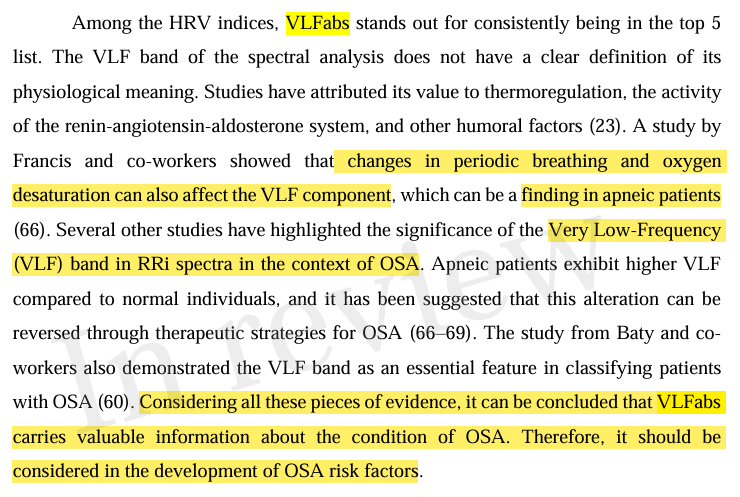

In [22]:
dfLORE["VLFABS"]

0       340.277000
1       146.631900
2      1027.437100
3       910.045600
4       578.287900
          ...     
439     125.851276
440     901.120244
441     220.755653
442      74.502033
443     286.651482
Name: VLFABS, Length: 444, dtype: float64

# No caso das regras qual foi o conjunto operador e threshold que foi analisado sempre que o VLFABS aparece 

In [23]:
import pandas as pd
import re

# Filtrar apenas as regras que mencionam VLFABS em alguma premissa
colunas_atributos = [col for col in complete_rules.columns if "Atributo" in col]
mask = complete_rules[colunas_atributos].apply(lambda x: "VLFABS" in x.values, axis=1)
df_vlfabs = complete_rules[mask].copy()

# Criar um novo DataFrame contendo apenas as premissas com VLFABS
dados_filtrados = []

for _, row in df_vlfabs.iterrows():
    # Extrair o índice do indivíduo a partir do nome do arquivo (ex: "explicacao_104.txt" -> 104)
    match = re.search(r"_(\d+)\.txt", row["Arquivo"])
    idx = int(match.group(1)) if match else None

    novo_registro = {
        "Arquivo": row["Arquivo"],
        "Classe_Real": row["Classe_Real"],
        "Classe_Prevista": row["Classe_Prevista"],
        "VLFABS_Real": df_acertos.loc[idx, "VLFABS"] if idx in complete_rules.index else "UNKNOWN"
    }

    # Adicionar apenas as premissas que mencionam VLFABS
    for i in range(1, 27):  # Supondo que tenha no máximo 26 premissas
        att_col = f"Premissa_{i}_Atributo"
        op_col = f"Premissa_{i}_Operador"
        val_col = f"Premissa_{i}_Valor"

        if att_col in row and row[att_col] == "VLFABS":
            novo_registro[f"VLFABS_{i}_Operador"] = row[op_col]
            novo_registro[f"VLFABS_{i}_Valor"] = row[val_col]

    dados_filtrados.append(novo_registro)

# Criar um DataFrame filtrado
df_vlfabs_filtrado = pd.DataFrame(dados_filtrados)

# Salvar o novo DataFrame
df_vlfabs_filtrado.to_csv("explicacoes_VLFABS_filtrado.csv", index=False)

# Exibir as primeiras linhas
df_vlfabs_filtrado

,Arquivo,Classe_Real,Classe_Prevista,VLFABS_Real,VLFABS_4_Operador,VLFABS_4_Valor,VLFABS_1_Operador,VLFABS_1_Valor,VLFABS_2_Operador,VLFABS_2_Valor,...,VLFABS_8_Operador,VLFABS_8_Valor,VLFABS_13_Operador,VLFABS_13_Valor,VLFABS_14_Operador,VLFABS_14_Valor,VLFABS_10_Operador,VLFABS_10_Valor,VLFABS_9_Operador,VLFABS_9_Valor
0,explicacao_0.txt,3,3,340.2770,<=,1100.488647,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,explicacao_10.txt,3,3,360.4708,NaN,NaN,<=,983.783936,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,explicacao_100.txt,1,1,317.7042,<=,707.904724,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,explicacao_101.txt,1,1,421.7598,NaN,NaN,NaN,NaN,<=,846.938171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,explicacao_102.txt,1,1,14.2099,NaN,NaN,<=,14.563124,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,explicacao_95.txt,1,1,777.0798,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,explicacao_96.txt,1,1,531.5535,NaN,NaN,<=,705.096222,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,explicacao_97.txt,1,1,103.5525,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,explicacao_98.txt,1,1,289.8215,NaN,NaN,NaN,NaN,<=,905.555969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
classe_0 = complete_rules[complete_rules['Classe_Real'] == 0]
classe_1 = complete_rules[complete_rules['Classe_Real'] == 1]
classe_2 = complete_rules[complete_rules['Classe_Real'] == 2]
classe_3 = complete_rules[complete_rules['Classe_Real'] == 3]
classes = {i: complete_rules[complete_rules['Classe_Real'] == i] for i in range(4)}

In [37]:
# Lista de colunas de atributos
atributo_cols = [col for col in complete_rules.columns if 'Premissa' in col and 'Atributo' in col]

# Contagem de atributos por classe
contagens_atributos = {}
for classe, df_classe in classes.items():
    # Empilha todas as colunas de atributo em uma única série
    atributos_empilhados = pd.concat([df_classe[col] for col in atributo_cols])
    # Conta as ocorrências de cada atributo
    contagem = atributos_empilhados.value_counts()
    contagens_atributos[classe] = contagem

print("\nContagem de atributos para a classe GRAVE:")
print(contagens_atributos[0])
print("\nContagem de atributos para a classe LEVE:")
print(contagens_atributos[1])
print("\nContagem de atributos para a classe MODERADO:")
print(contagens_atributos[2])
print("\nContagem de atributos para a classe NORMAL:")
print(contagens_atributos[3])


Contagem de atributos para a classe GRAVE:
SATMIN     106
T90        101
VLFABS      91
ATTEN       56
SYMB2UV     42
PESO        38
DISTEN      36
IDADE       34
LFHF        27
W2          25
SDNN        24
W3          24
F           22
ALTURA      20
BIN0V       20
DC          19
EHLERS      16
DISPEN      16
HFNU        16
W0          16
LFNU        15
MEANRR      14
DFA         14
AC          14
PORTAS      14
IMC         14
RMSSD       14
HFABS       12
FUZZYEN     12
PHASEEN     11
SYMB0V      11
PIP         10
BIN1V       10
SAMPEN      10
GUZIKS      10
PERMEN      10
W1           9
SYMB1V       9
M            9
BIN2V        6
SYMB2LV      5
LFABS        4
Name: count, dtype: int64

Contagem de atributos para a classe LEVE:
VLFABS     61
SATMIN     57
T90        56
PESO       36
IDADE      23
IMC        23
LFABS      21
RMSSD      18
F          17
PORTAS     16
MEANRR     15
BIN0V      15
LFHF       14
W0         14
HFNU       14
ATTEN      14
SYMB2UV    13
W2         13
GUZIK